In [807]:
# install dependencies for prophet
!pip install prophet


In [808]:
#import dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from prophet import Prophet

%matplotlib inline

In [809]:
# import the 911 event data
tri_state_911_df = pd.read_csv('resources/birthdata/ny_nj_ct_911_birth_data.csv', index_col='Date', parse_dates=True)
other_states_911_df = pd.read_csv('resources/birthdata/other_states_911_birth_data.csv', index_col='Date', parse_dates=True)
# import the katrina data
la_katrina_df = pd.read_csv('resources/birthdata/la_katrina_birth_data.csv', index_col='Date', parse_dates=True)
other_states_katrina_df = pd.read_csv('resources/birthdata/other_states_katrina_birth_data.csv', index_col='Date', parse_dates=True)

# display the data
display(tri_state_911_df.info())
display(other_states_911_df.info())
display(la_katrina_df.info())
display(other_states_katrina_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 936 entries, 1990-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    936 non-null    int64 
 1   Births  936 non-null    int64 
 2   State   936 non-null    object
dtypes: int64(2), object(1)
memory usage: 29.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14352 entries, 1990-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    14352 non-null  int64 
 1   Births  14352 non-null  int64 
 2   State   14352 non-null  object
dtypes: int64(2), object(1)
memory usage: 448.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 1990-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    312 non-null    int64 
 1   Births  312 non-null    int64 
 2   State   312 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1990-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    14976 non-null  int64 
 1   Births  14976 non-null  int64 
 2   State   14976 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.0+ KB


None

In [810]:
# drop Year  and State column
tri_state_911_df.drop(columns=['Year','State'], inplace=True)
other_states_911_df.drop(columns=['Year','State'], inplace=True)
la_katrina_df.drop(columns=['Year','State'], inplace=True)
other_states_katrina_df.drop(columns=['Year','State'], inplace=True)

# rename the columns
tri_state_911_df.columns = ['NY_NJ_CT_911_Births']
other_states_911_df.columns = ['Other_States_911_Births']   
la_katrina_df.columns = ['LA_Katrina_Births']
other_states_katrina_df.columns = ['Other_States_Katrina_Births']


# display the data
display(tri_state_911_df.info())
display(other_states_911_df.info())
display(la_katrina_df.info())
display(other_states_katrina_df.info())




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 936 entries, 1990-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NY_NJ_CT_911_Births  936 non-null    int64
dtypes: int64(1)
memory usage: 14.6 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14352 entries, 1990-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Other_States_911_Births  14352 non-null  int64
dtypes: int64(1)
memory usage: 224.2 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 1990-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   LA_Katrina_Births  312 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14976 entries, 1990-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Other_States_Katrina_Births  14976 non-null  int64
dtypes: int64(1)
memory usage: 234.0 KB


None

In [811]:
# sum of births for every day
tri_state_911_df = tri_state_911_df.groupby('Date').sum()
other_states_911_df = other_states_911_df.groupby('Date').sum()
la_katrina_df = la_katrina_df.groupby('Date').sum()
other_states_katrina_df = other_states_katrina_df.groupby('Date').sum()

# display the data
display(tri_state_911_df.head())
display(other_states_911_df.head())
display(la_katrina_df.head())
display(other_states_katrina_df.head())


,NY_NJ_CT_911_Births
Date,
1990-01-01,22937
1990-02-01,21269
1990-03-01,23738
1990-04-01,22714
1990-05-01,23873


,Other_States_911_Births
Date,
1990-01-01,281080
1990-02-01,261741
1990-03-01,293602
1990-04-01,282446
1990-05-01,297371


,LA_Katrina_Births
Date,
1990-01-01,7386
1990-02-01,6906
1990-03-01,7933
1990-04-01,7863
1990-05-01,8282


,Other_States_Katrina_Births
Date,
1990-01-01,296631
1990-02-01,276104
1990-03-01,309407
1990-04-01,297297
1990-05-01,312962


In [812]:
# create a new dataframe with data from 1998 to 2000 for 911 data

tri_state_911_98_00_df = tri_state_911_df.loc['1998-01-01':'2000-12-31']
other_states_911_98_00_df = other_states_911_df.loc['1998-01-01':'2000-12-31']
# create a new dataframe with data from 2002 to 2004 for 911 data
tri_state_911_02_04_df = tri_state_911_df.loc['2002-01-01':'2004-12-31']
other_states_911_02_04_df = other_states_911_df.loc['2002-01-01':'2004-12-31']
# display the data
# display(tri_state_911_02_04_df.head())
# display(other_states_911_02_04_df.head())
display(tri_state_911_02_04_df.info())
display(other_states_911_02_04_df.info())
display(tri_state_911_02_04_df.dtypes)




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2002-01-01 to 2004-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NY_NJ_CT_911_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2002-01-01 to 2004-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Other_States_911_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

NY_NJ_CT_911_Births    int64
dtype: object

In [813]:
# create a new dataframe with data from 2002 to 2004 for katrina data
la_katrina_02_04_df = la_katrina_df.loc['2002-01-01':'2004-12-31']
other_states_katrina_02_04_df = other_states_katrina_df.loc['2002-01-01':'2004-12-31']
# display the data
display(la_katrina_02_04_df.info())
display(other_states_katrina_02_04_df.info())
# create a new dataframe with data from 2006 to 2008 for katrina data
la_katrina_06_08_df = la_katrina_df.loc['2006-01-01':'2008-12-31']
other_states_katrina_06_08_df = other_states_katrina_df.loc['2006-01-01':'2008-12-31']
# display the data
display(la_katrina_06_08_df.info())
display(other_states_katrina_06_08_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2002-01-01 to 2004-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   LA_Katrina_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2002-01-01 to 2004-12-01
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Other_States_Katrina_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2006-01-01 to 2008-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   LA_Katrina_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2006-01-01 to 2008-12-01
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Other_States_Katrina_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

In [814]:
# create a dataframe that shows the average number of births for every month from 1998 to 2000 for 911 data
tri_state_911_98_00_avg_df = tri_state_911_98_00_df.groupby(tri_state_911_98_00_df.index.month).mean()
other_states_911_98_00_avg_df = other_states_911_98_00_df.groupby(other_states_911_98_00_df.index.month).mean()

# create a dataframe that shows the average number of births for every month from 2002 to 2004 for 911 data
tri_state_911_02_04_avg_df = tri_state_911_02_04_df.groupby(tri_state_911_02_04_df.index.month).mean()
other_states_911_02_04_avg_df = other_states_911_02_04_df.groupby(other_states_911_02_04_df.index.month).mean()

# display the data
display(tri_state_911_98_00_avg_df.head())
display(other_states_911_98_00_avg_df.head())
display(tri_state_911_98_00_avg_df.info())
display(other_states_911_98_00_avg_df.info())
display(tri_state_911_02_04_avg_df.head())
display(other_states_911_02_04_avg_df.head())
display(tri_state_911_02_04_avg_df.info())
display(other_states_911_02_04_avg_df.info())




,NY_NJ_CT_911_Births
Date,
1,22509.000000
2,21204.000000
3,23355.333333
4,22073.333333
5,23110.666667


,Other_States_911_Births
Date,
1,269100.000000
2,253814.000000
3,278438.333333
4,265294.666667
5,278098.333333


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NY_NJ_CT_911_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Other_States_911_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

,NY_NJ_CT_911_Births
Date,
1,29808.000000
2,27914.000000
3,30667.666667
4,29766.666667
5,30901.666667


,Other_States_911_Births
Date,
1,290652.333333
2,271349.333333
3,296976.000000
4,289163.000000
5,299403.333333


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NY_NJ_CT_911_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Other_States_911_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

In [815]:
# create a dataframe that shows the average number of births for every month from 2002 to 2004 for katrina data
la_katrina_02_04_avg_df = la_katrina_02_04_df.groupby(la_katrina_02_04_df.index.month).mean()
other_states_katrina_02_04_avg_df = other_states_katrina_02_04_df.groupby(other_states_katrina_02_04_df.index.month).mean()
# create a dataframe that shows the average number of births for every month from 2006 to 2008 for katrina data
la_katrina_06_08_avg_df = la_katrina_06_08_df.groupby(la_katrina_06_08_df.index.month).mean()
other_states_katrina_06_08_avg_df = other_states_katrina_06_08_df.groupby(other_states_katrina_06_08_df.index.month).mean()
# display the data
display(la_katrina_02_04_avg_df.head())
display(other_states_katrina_02_04_avg_df.head())
display(la_katrina_02_04_avg_df.info())
display(other_states_katrina_02_04_avg_df.info())
display(la_katrina_06_08_avg_df.head())
display(other_states_katrina_06_08_avg_df.head())
display(la_katrina_06_08_avg_df.info())
display(other_states_katrina_06_08_avg_df.info())



,LA_Katrina_Births
Date,
1,5759.333333
2,5236.333333
3,5697.666667
4,5660.000000
5,5770.000000


,Other_States_Katrina_Births
Date,
1,314701.000000
2,294027.000000
3,321946.000000
4,313269.666667
5,324535.000000


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LA_Katrina_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Other_States_Katrina_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

,LA_Katrina_Births
Date,
1,5459.333333
2,4842.333333
3,5235.666667
4,4842.666667
5,5014.000000


,Other_States_Katrina_Births
Date,
1,345106.333333
2,323373.333333
3,350845.666667
4,333300.666667
5,352533.333333


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LA_Katrina_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Other_States_Katrina_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

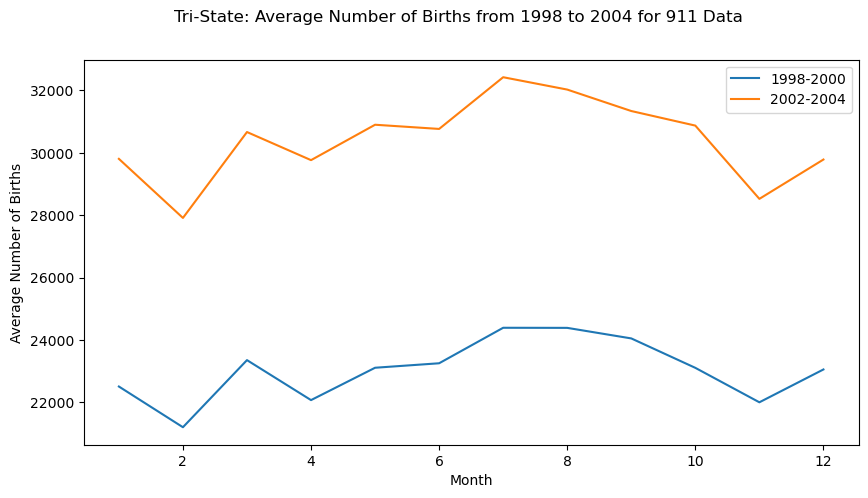

In [816]:
# how to show a plot of 4 types of data in one plot, show the labels and the legend
plt.figure(figsize=(10,5)).suptitle('Tri-State: Average Number of Births from 1998 to 2004 for 911 Data')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.plot(tri_state_911_98_00_avg_df, label='1998-2000')
plt.plot(tri_state_911_02_04_avg_df, label='2002-2004')
plt.legend()
plt.show()



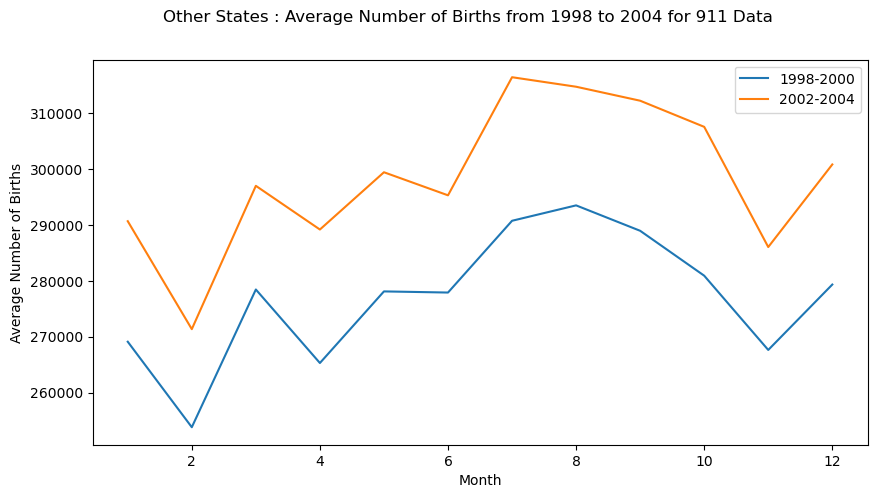

In [817]:
# plot the other states average number of births for every month from 1998 to 2000 for 911 data and average number of births for every month from 2002 to 2004 for 911 data
plt.figure(figsize=(10,5)).suptitle('Other States : Average Number of Births from 1998 to 2004 for 911 Data')
plt.plot(other_states_911_98_00_avg_df, label='1998-2000')
plt.plot(other_states_911_02_04_avg_df, label='2002-2004')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.legend()
plt.show()


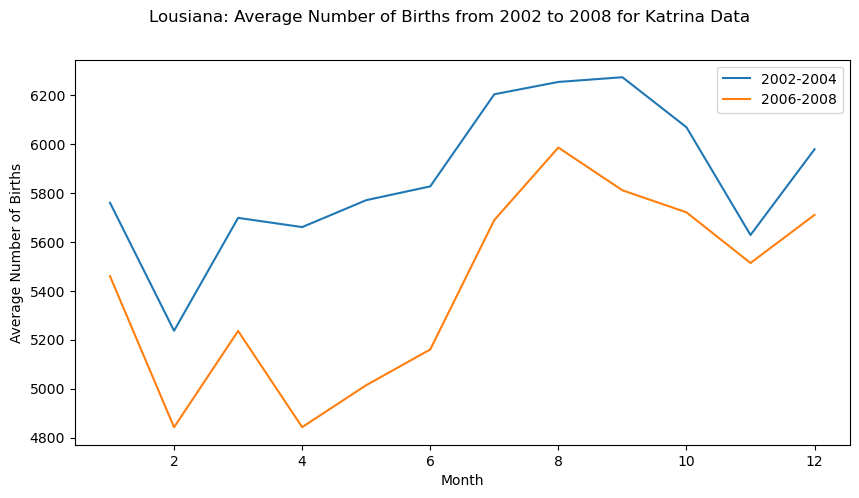

In [818]:
# plot the LA average number of births for every month from 2002 to 2004 for katrina data and average number of births for every month from 2006 to 2008 for katrina data
plt.figure(figsize=(10,5)).suptitle('Lousiana: Average Number of Births from 2002 to 2008 for Katrina Data')
plt.plot(la_katrina_02_04_avg_df, label='2002-2004')
plt.plot(la_katrina_06_08_avg_df, label='2006-2008')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.legend()
plt.show()


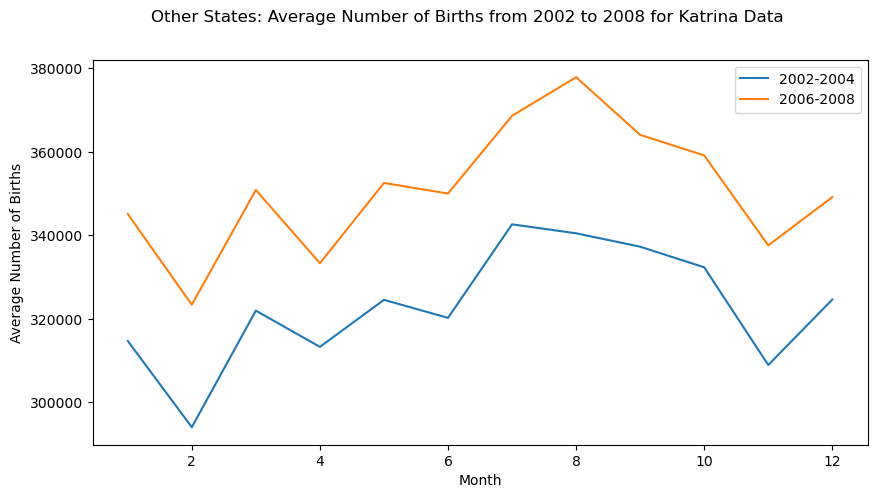

In [819]:
# plot the other states average number of births for every month from 2002 to 2004 for katrina data and average number of births for every month from 2006 to 2008 for katrina data
plt.figure(figsize=(10,5)).suptitle('Other States: Average Number of Births from 2002 to 2008 for Katrina Data')
plt.plot(other_states_katrina_02_04_avg_df, label='2002-2004')
plt.plot(other_states_katrina_06_08_avg_df, label='2006-2008')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.legend()
plt.show()


<Axes: title={'center': 'Other States Katrina Birth Data'}, xlabel='Date'>

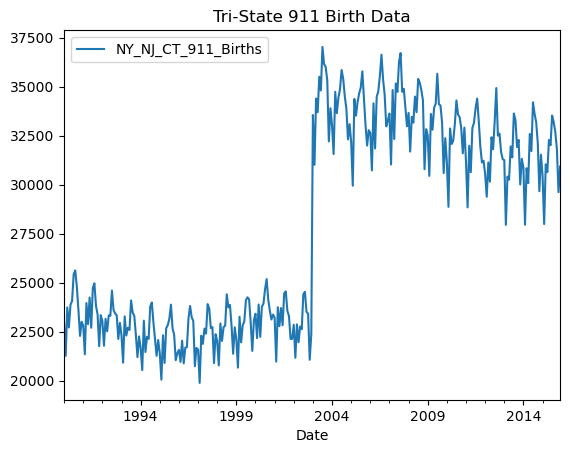

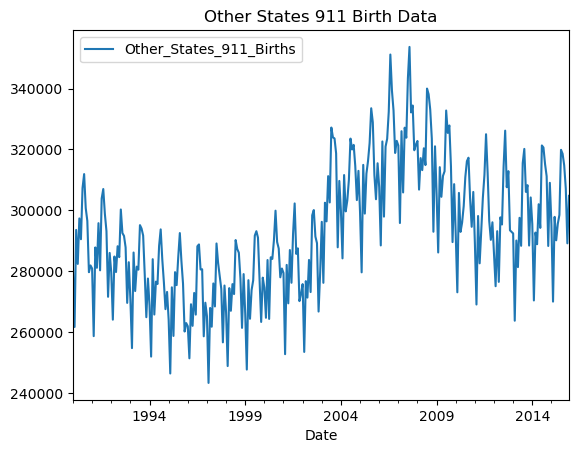

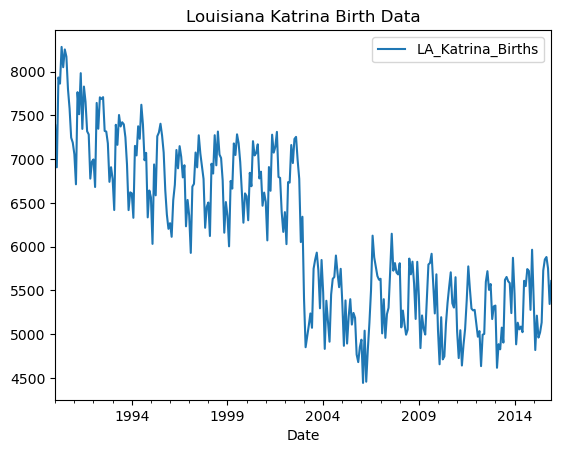

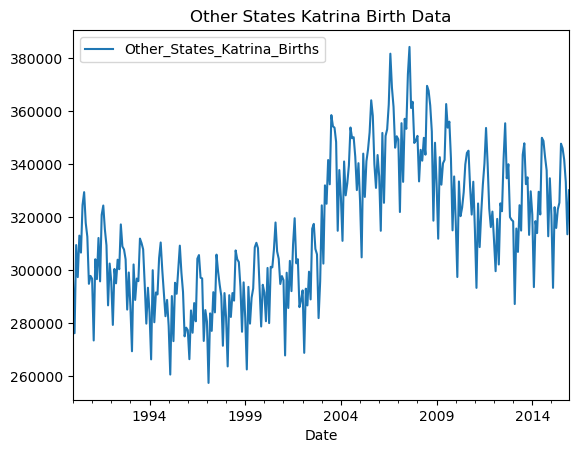

In [820]:
# plot the data and how to show the title of the plot

tri_state_911_df.plot(title='Tri-State 911 Birth Data')
other_states_911_df.plot(title='Other States 911 Birth Data')
la_katrina_df.plot(title='Louisiana Katrina Birth Data')
other_states_katrina_df.plot(title='Other States Katrina Birth Data')


In [821]:
# reset the index for the dataframes to use with prophet
tri_state_911_df.reset_index(inplace=True)
other_states_911_df.reset_index(inplace=True)
la_katrina_df.reset_index(inplace=True)
other_states_katrina_df.reset_index(inplace=True)

# rename the columns
tri_state_911_df.columns = ['ds', 'y']
other_states_911_df.columns = ['ds', 'y']
la_katrina_df.columns = ['ds', 'y']
other_states_katrina_df.columns = ['ds', 'y']



In [822]:
# 911 DATA
# 

In [823]:
# slice the data to use only the data upto September 2001 for 911 data
tri_state_911_to_01_df = tri_state_911_df[(tri_state_911_df['ds'] <= '2001-08-01')]
other_states_911_to_01_df = other_states_911_df[(other_states_911_df['ds'] <= '2001-08-01')]

# slice the data to use only the data from September 2001 to September 2004 for 911 data
tri_state_911_01_04_df = tri_state_911_df[(tri_state_911_df['ds'] >= '2001-09-01') & (tri_state_911_df['ds'] <= '2004-08-01')]
other_states_911_01_04_df = other_states_911_df[(other_states_911_df['ds'] >= '2001-09-01') & (other_states_911_df['ds'] <= '2004-08-01')]

# display the data
display(tri_state_911_to_01_df.head())
display(other_states_911_to_01_df.head())
display(tri_state_911_01_04_df.head())
display(other_states_911_01_04_df.head())


,ds,y
0,1990-01-01,22937
1,1990-02-01,21269
2,1990-03-01,23738
3,1990-04-01,22714
4,1990-05-01,23873


,ds,y
0,1990-01-01,281080
1,1990-02-01,261741
2,1990-03-01,293602
3,1990-04-01,282446
4,1990-05-01,297371


,ds,y
140,2001-09-01,23558
141,2001-10-01,23299
142,2001-11-01,22128
143,2001-12-01,22137
144,2002-01-01,22856


,ds,y
140,2001-09-01,285736
141,2001-10-01,287545
142,2001-11-01,270231
143,2001-12-01,272629
144,2002-01-01,275815


In [824]:
# create a dataframe that shows the actual number of births for every month upto 2004 for 911 data
tri_state_911_actual_df = tri_state_911_df[(tri_state_911_df['ds'] <= '2004-08-01')]
other_states_911_actual_df = other_states_911_df[(other_states_911_df['ds'] <= '2004-08-01')]

<Axes: title={'center': '911 Births in Other States between 2001 and 2004'}, xlabel='ds'>

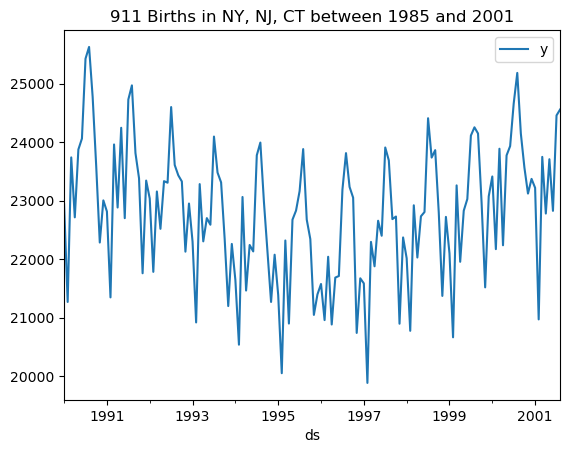

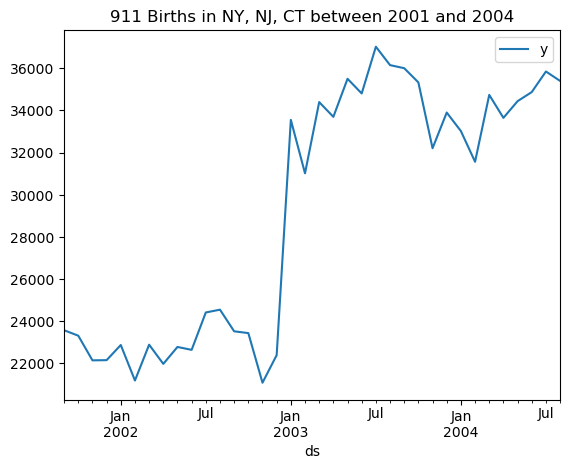

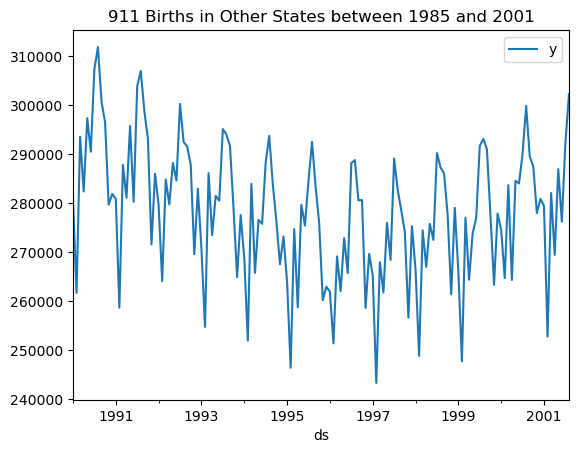

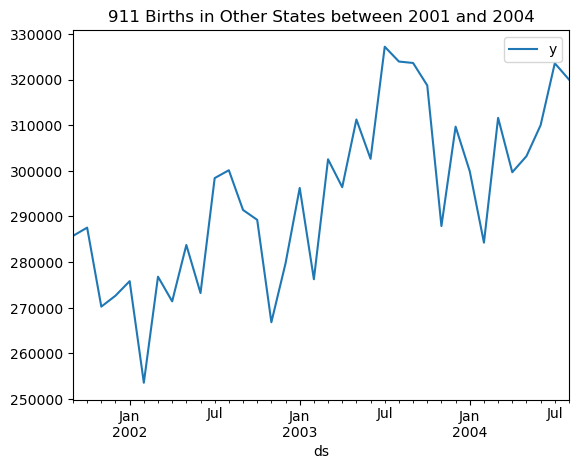

In [825]:
# plot the data
tri_state_911_to_01_df.plot(x='ds', y='y', title='911 Births in NY, NJ, CT between 1985 and 2001')
tri_state_911_01_04_df.plot(x='ds', y='y', title='911 Births in NY, NJ, CT between 2001 and 2004')

other_states_911_to_01_df.plot(x='ds', y='y', title='911 Births in Other States between 1985 and 2001')
other_states_911_01_04_df.plot(x='ds', y='y', title='911 Births in Other States between 2001 and 2004')

In [826]:
# create a prophet model
m911 = Prophet()
m911_other = Prophet()


In [827]:
# fit the model
m911.fit(tri_state_911_to_01_df)
m911_other.fit(other_states_911_to_01_df)


06:03:52 - cmdstanpy - INFO - Chain [1] start processing
06:03:52 - cmdstanpy - INFO - Chain [1] done processing
06:03:52 - cmdstanpy - INFO - Chain [1] start processing
06:03:52 - cmdstanpy - INFO - Chain [1] done processing


In [828]:
# create a future dataframe for 911 data and predict the values for the next 10 years
future911 = m911.make_future_dataframe(periods=36, freq='M')
future911_other = m911_other.make_future_dataframe(periods=36, freq='M')
forecast911 = m911.predict(future911)
forecast911_other = m911_other.predict(future911_other)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [829]:
# display the forecast
display(forecast911.tail())
display(forecast911_other.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
171,2004-03-31,24570.115676,22886.730059,23775.339689,24380.819257,24736.044319,-1221.854380,-1221.854380,-1221.854380,-1221.854380,-1221.854380,-1221.854380,0.0,0.0,0.0,23348.261296
172,2004-04-30,24595.755573,24263.194119,25159.473522,24395.995361,24770.031290,121.147045,121.147045,121.147045,121.147045,121.147045,121.147045,0.0,0.0,0.0,24716.902618
173,2004-05-31,24622.250134,24018.365122,24914.832365,24413.125655,24809.474441,-156.474871,-156.474871,-156.474871,-156.474871,-156.474871,-156.474871,0.0,0.0,0.0,24465.775263
174,2004-06-30,24647.890031,25479.843563,26396.884100,24429.612700,24842.946694,1283.680437,1283.680437,1283.680437,1283.680437,1283.680437,1283.680437,0.0,0.0,0.0,25931.570467
175,2004-07-31,24674.384591,25817.513572,26783.143626,24445.972464,24873.147103,1648.952005,1648.952005,1648.952005,1648.952005,1648.952005,1648.952005,0.0,0.0,0.0,26323.336596


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
171,2004-03-31,292454.002128,275006.857646,283771.947681,290710.475706,294178.996361,-13054.631896,-13054.631896,-13054.631896,-13054.631896,-13054.631896,-13054.631896,0.0,0.0,0.0,279399.370232
172,2004-04-30,292705.082495,289848.195611,298560.743415,290885.512151,294517.299622,1497.129858,1497.129858,1497.129858,1497.129858,1497.129858,1497.129858,0.0,0.0,0.0,294202.212352
173,2004-05-31,292964.532207,284619.065980,294049.768091,291097.280840,294865.693563,-3386.155945,-3386.155945,-3386.155945,-3386.155945,-3386.155945,-3386.155945,0.0,0.0,0.0,289578.376262
174,2004-06-30,293215.612573,302598.216557,311330.786304,291272.174329,295222.408137,13501.059875,13501.059875,13501.059875,13501.059875,13501.059875,13501.059875,0.0,0.0,0.0,306716.672449
175,2004-07-31,293475.062286,307946.862673,317058.473340,291461.749628,295573.593828,19010.132087,19010.132087,19010.132087,19010.132087,19010.132087,19010.132087,0.0,0.0,0.0,312485.194372


/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


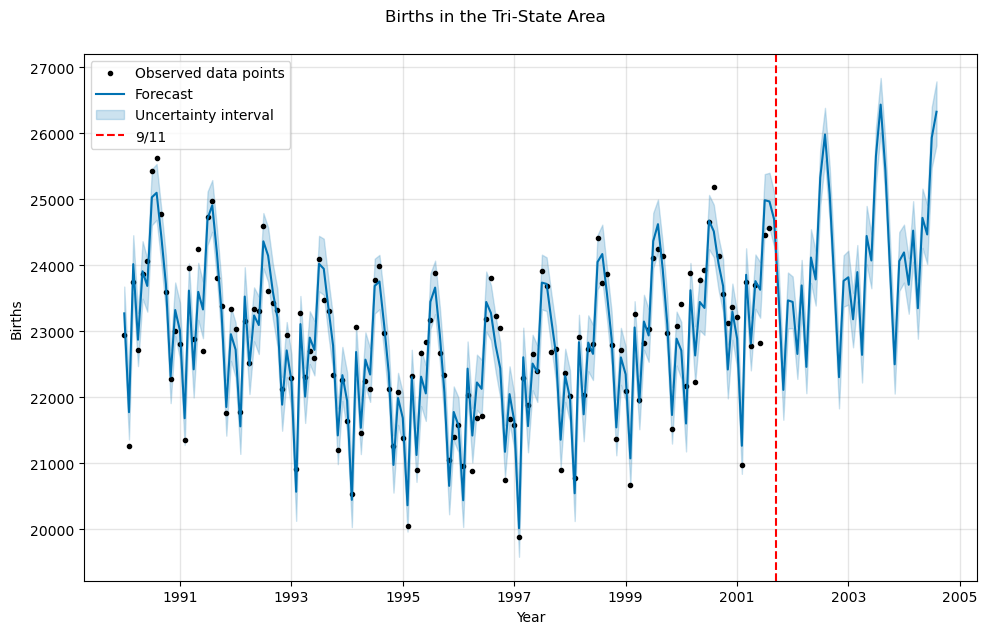

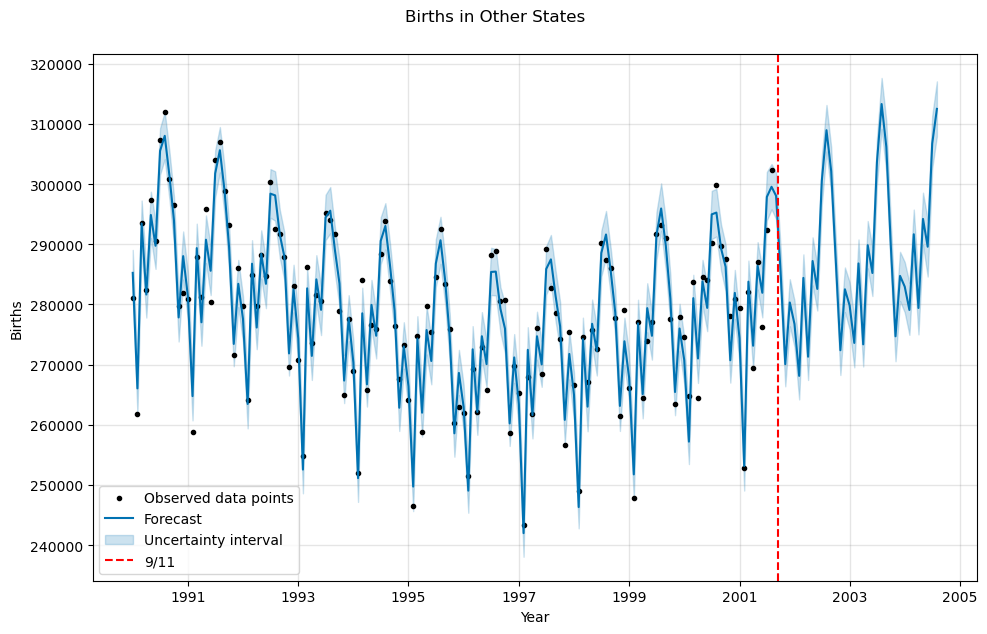

In [830]:
# plot the prediction
fig911 = m911.plot(forecast911)
fig911.suptitle('Births in the Tri-State Area', fontsize=12, y=1.05, x=0.5)
# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')
plt.xlabel('Year')
plt.ylabel('Births')
plt.legend()
plt.show()
fig911_other = m911_other.plot(forecast911_other)
fig911_other.suptitle('Births in Other States', fontsize=12, y=1.05, x=0.5)
# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')
plt.xlabel('Year')
plt.ylabel('Births')
plt.legend()
plt.show()

/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

Text(0.5, 0.98, 'Prediction for NY, NJ and CT states')

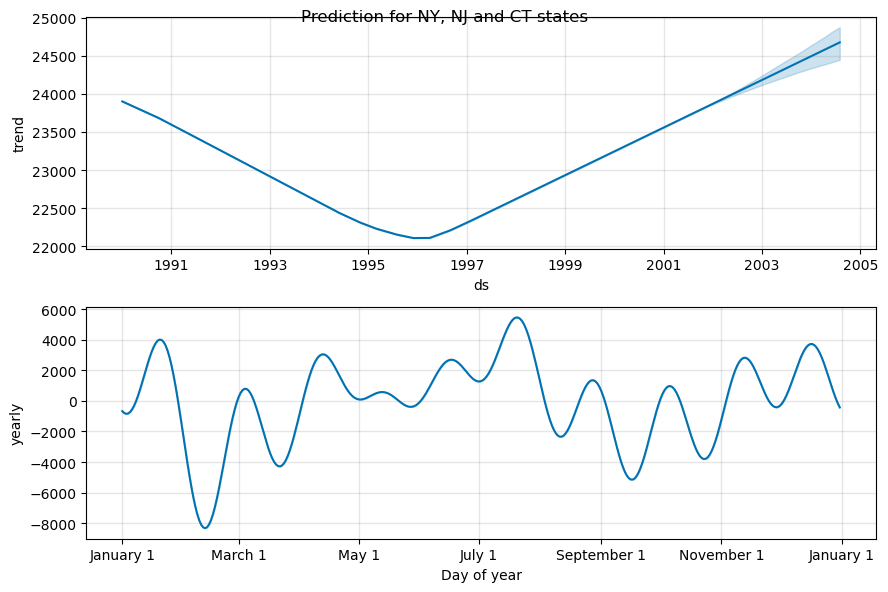

In [831]:
# plot the components
fig911_comp = m911.plot_components(forecast911)
fig911_comp.suptitle('Prediction for NY, NJ and CT states', fontsize=12)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

Text(0.5, 0.98, 'Prediction for States other than NY, NJ and CT')

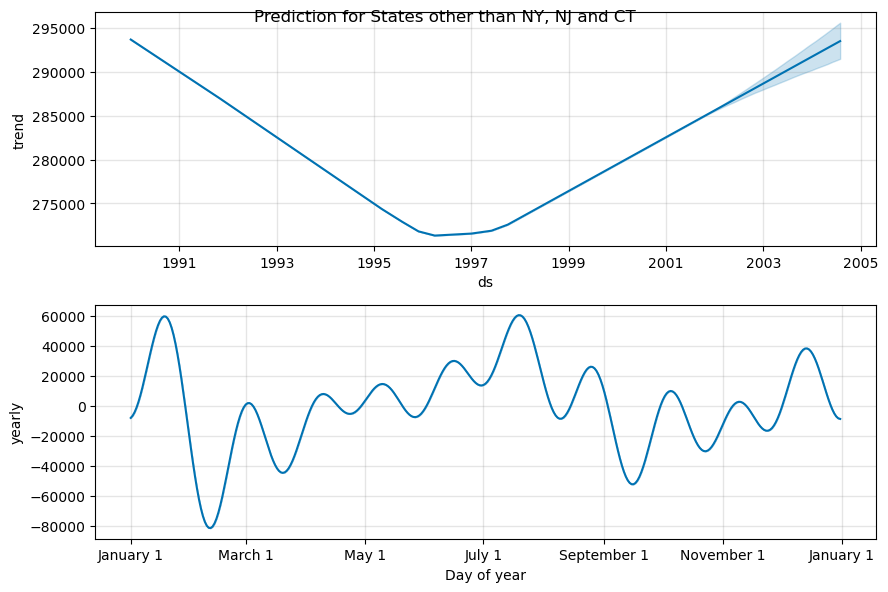

In [832]:
# plot the components and add title "Prediction from 2001 to 2011 for States other than NY, NJ and CT" to the plots

fig911_other_comp = m911_other.plot_components(forecast911_other)
fig911_other_comp.suptitle('Prediction for States other than NY, NJ and CT', fontsize=12)

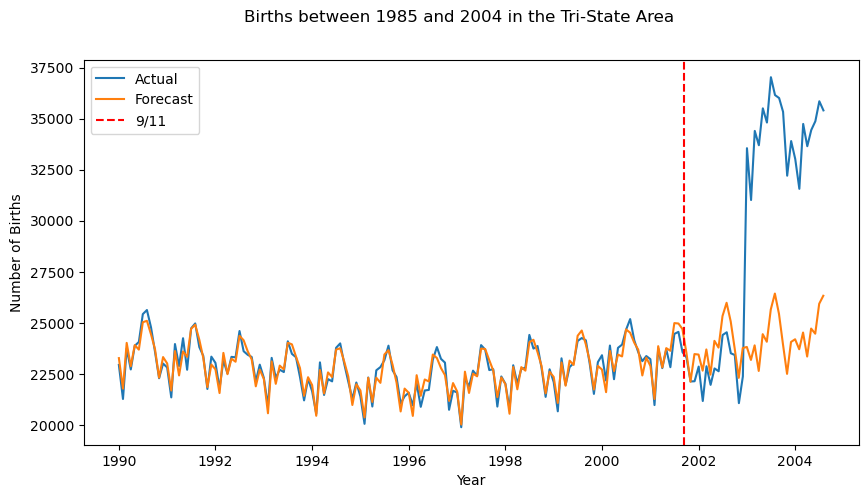

In [833]:
# compare the forecast with the actual data for 911 data
plt.figure(figsize=(10,5)).suptitle('Births between 1985 and 2004 in the Tri-State Area')
plt.plot(tri_state_911_actual_df['ds'], tri_state_911_actual_df['y'], label='Actual')
plt.plot(forecast911['ds'], forecast911['yhat'], label='Forecast')

# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')

plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()


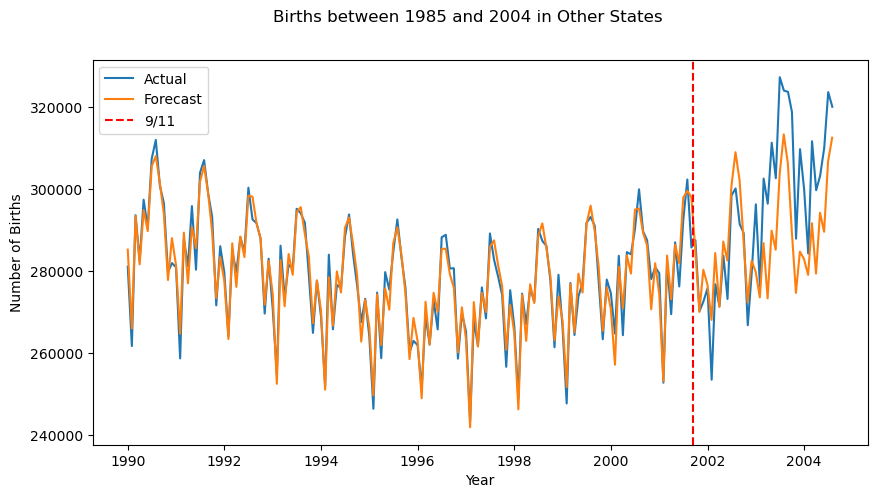

In [834]:
# compare the forecast with the actual data for 911 data for other states
plt.figure(figsize=(10,5)).suptitle('Births between 1985 and 2004 in Other States')
plt.plot(other_states_911_actual_df['ds'], other_states_911_actual_df['y'], label='Actual')
plt.plot(forecast911_other['ds'], forecast911_other['yhat'], label='Forecast')

# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')

plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()


In [835]:
# KATRINA DATA

In [836]:
# select data only upto August 2005 for Katrina data
la_katrina_to_05_df = la_katrina_df[(la_katrina_df['ds'] <= '2005-07-01')]
other_states_katrina_to_05_df = other_states_katrina_df[(other_states_katrina_df['ds'] <= '2005-07-01')]

# select data only from August 2005 to August 2008 for Katrina data
la_katrina_05_08_df = la_katrina_df[(la_katrina_df['ds'] >= '2005-08-01') & (la_katrina_df['ds'] <= '2008-08-01')]
other_states_katrina_05_08_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2005-08-01') & (other_states_katrina_df['ds'] <= '2008-08-01')]

# display the data
display(la_katrina_to_05_df.head())
display(other_states_katrina_to_05_df.head())
display(la_katrina_05_08_df.head())
display(other_states_katrina_05_08_df.head())
display(la_katrina_to_05_df.info())
display(other_states_katrina_to_05_df.info())
display(la_katrina_05_08_df.info())
display(other_states_katrina_05_08_df.info())



,ds,y
0,1990-01-01,7386
1,1990-02-01,6906
2,1990-03-01,7933
3,1990-04-01,7863
4,1990-05-01,8282


,ds,y
0,1990-01-01,296631
1,1990-02-01,276104
2,1990-03-01,309407
3,1990-04-01,297297
4,1990-05-01,312962


,ds,y
187,2005-08-01,5242
188,2005-09-01,5186
189,2005-10-01,4766
190,2005-11-01,4680
191,2005-12-01,4851


,ds,y
187,2005-08-01,364074
188,2005-09-01,358183
189,2005-10-01,339873
190,2005-11-01,330987
191,2005-12-01,343403


<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      187 non-null    datetime64[ns]
 1   y       187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      187 non-null    datetime64[ns]
 1   y       187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 187 to 223
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      37 non-null     datetime64[ns]
 1   y       37 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 888.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 187 to 223
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      37 non-null     datetime64[ns]
 1   y       37 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 888.0 bytes


None

In [837]:
# create a dataframe that shows the actual number of births for every month upto 2008 for katrina data
la_katrina_actual_df = la_katrina_df[(la_katrina_df['ds'] <= '2008-08-01')]
other_states_katrina_actual_df = other_states_katrina_df[(other_states_katrina_df['ds'] <= '2008-08-01')]


In [838]:
# # slice the data to use from August 2000 to August 2005 for Katrina data use monthly average for the data
# la_katrina_00_05_df = la_katrina_df[(la_katrina_df['ds'] >= '2000-08-01') & (la_katrina_df['ds'] <= '2005-08-01')]
# other_states_katrina_00_05_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2000-08-01') & (other_states_katrina_df['ds'] <= '2005-08-01')]
# # slice the data to use from August 2005 to August 2010 for Katrina data
# la_katrina_05_10_df = la_katrina_df[(la_katrina_df['ds'] >= '2005-08-01') & (la_katrina_df['ds'] <= '2010-08-01')]
# other_states_katrina_05_10_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2005-08-01') & (other_states_katrina_df['ds'] <= '2010-08-01')]
# # display the data
# display(la_katrina_00_05_df.head())
# display(other_states_katrina_00_05_df.head())
# display(la_katrina_05_10_df.head())
# display(other_states_katrina_05_10_df.head())
# display(la_katrina_00_05_df.info())


In [839]:
# # slice the data to use from August 2002 to August 2005 for Katrina data
# la_katrina_02_05_df = la_katrina_df[(la_katrina_df['ds'] >= '2002-08-01') & (la_katrina_df['ds'] <= '2005-08-01')]
# other_states_katrina_02_05_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2002-08-01') & (other_states_katrina_df['ds'] <= '2005-08-01')]
# # slice the data to use from August 2005 to August 2008 for Katrina data
# la_katrina_05_08_df = la_katrina_df[(la_katrina_df['ds'] >= '2005-08-01') & (la_katrina_df['ds'] <= '2008-08-01')]
# other_states_katrina_05_08_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2005-08-01') & (other_states_katrina_df['ds'] <= '2008-08-01')]


<Axes: title={'center': 'Births in Other States between 2005 and 2008 (after Katrina)'}, xlabel='ds'>

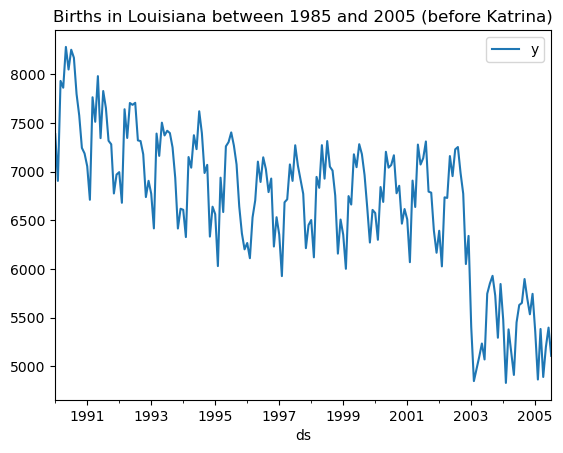

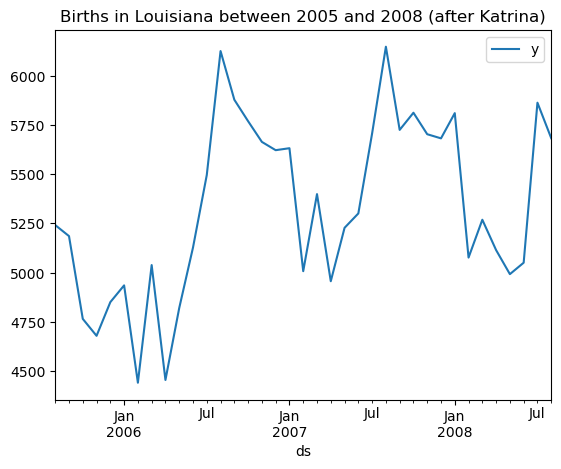

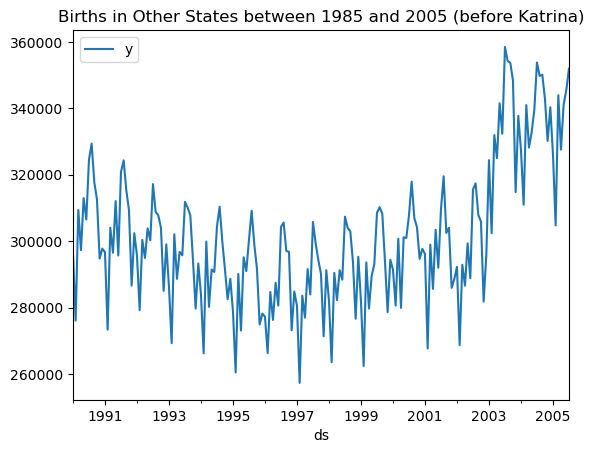

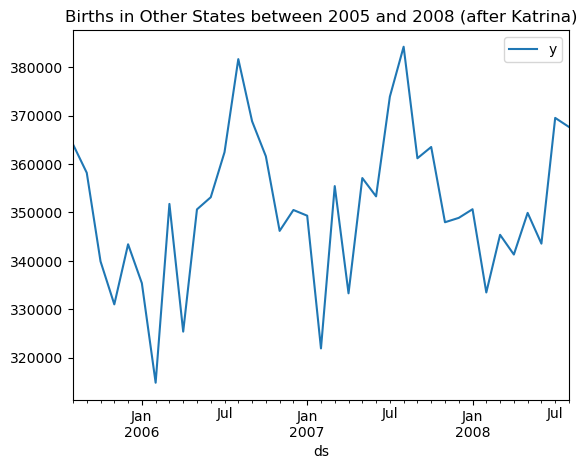

In [840]:
# plot the data up to Katrina and 3 years after Katrina
la_katrina_to_05_df.plot(x='ds', y='y', title='Births in Louisiana between 1985 and 2005 (before Katrina)')
la_katrina_05_08_df.plot(x='ds', y='y', title='Births in Louisiana between 2005 and 2008 (after Katrina)')
other_states_katrina_to_05_df.plot(x='ds', y='y', title='Births in Other States between 1985 and 2005 (before Katrina)')
other_states_katrina_05_08_df.plot(x='ds', y='y', title='Births in Other States between 2005 and 2008 (after Katrina)')

In [841]:
# create a prophet model
m_katrina = Prophet()
m_katrina_other = Prophet()

# fit the model
m_katrina.fit(la_katrina_to_05_df)
m_katrina_other.fit(other_states_katrina_to_05_df)

06:03:54 - cmdstanpy - INFO - Chain [1] start processing
06:03:54 - cmdstanpy - INFO - Chain [1] done processing
06:03:54 - cmdstanpy - INFO - Chain [1] start processing
06:03:54 - cmdstanpy - INFO - Chain [1] done processing


In [842]:
# create a future dataframe for Katrina data and predict the values for the next 3 years
future_katrina = m_katrina.make_future_dataframe(periods=36, freq='M')
future_katrina_other = m_katrina_other.make_future_dataframe(periods=36, freq='M')
forecast_katrina = m_katrina.predict(future_katrina)
forecast_katrina_other = m_katrina_other.predict(future_katrina_other)


/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [843]:
# display the forecast
display(forecast_katrina.tail())
display(forecast_katrina_other.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
218,2008-02-29,3836.488935,3503.143986,4211.546824,3698.150546,3957.889026,27.076349,27.076349,27.076349,27.076349,27.076349,27.076349,0.0,0.0,0.0,3863.565284
219,2008-03-31,3799.330798,3314.946974,4033.419357,3658.250535,3927.647292,-124.439417,-124.439417,-124.439417,-124.439417,-124.439417,-124.439417,0.0,0.0,0.0,3674.891381
220,2008-04-30,3763.371311,3794.451338,4487.098100,3616.621784,3898.521183,376.716076,376.716076,376.716076,376.716076,376.716076,376.716076,0.0,0.0,0.0,4140.087387
221,2008-05-31,3726.213174,3356.914131,4113.298209,3568.473451,3866.264613,26.972115,26.972115,26.972115,26.972115,26.972115,26.972115,0.0,0.0,0.0,3753.185288
222,2008-06-30,3690.253686,3835.510632,4570.508694,3527.822144,3837.790370,519.941255,519.941255,519.941255,519.941255,519.941255,519.941255,0.0,0.0,0.0,4210.194941


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
218,2008-02-29,387357.357849,375096.018970,393214.267216,383411.690750,391097.664768,-2810.044634,-2810.044634,-2810.044634,-2810.044634,-2810.044634,-2810.044634,0.0,0.0,0.0,384547.313215
219,2008-03-31,388526.117538,365465.119224,383559.492618,384348.315970,392417.439342,-13648.178459,-13648.178459,-13648.178459,-13648.178459,-13648.178459,-13648.178459,0.0,0.0,0.0,374877.939080
220,2008-04-30,389657.175302,383503.375948,401343.297346,385296.007896,393749.787069,2762.555424,2762.555424,2762.555424,2762.555424,2762.555424,2762.555424,0.0,0.0,0.0,392419.730726
221,2008-05-31,390825.934991,376449.681915,394529.509974,386277.598500,395124.269012,-5532.303669,-5532.303669,-5532.303669,-5532.303669,-5532.303669,-5532.303669,0.0,0.0,0.0,385293.631322
222,2008-06-30,391956.992755,397997.236967,416641.268388,387199.824699,396487.603485,15814.220031,15814.220031,15814.220031,15814.220031,15814.220031,15814.220031,0.0,0.0,0.0,407771.212786


/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


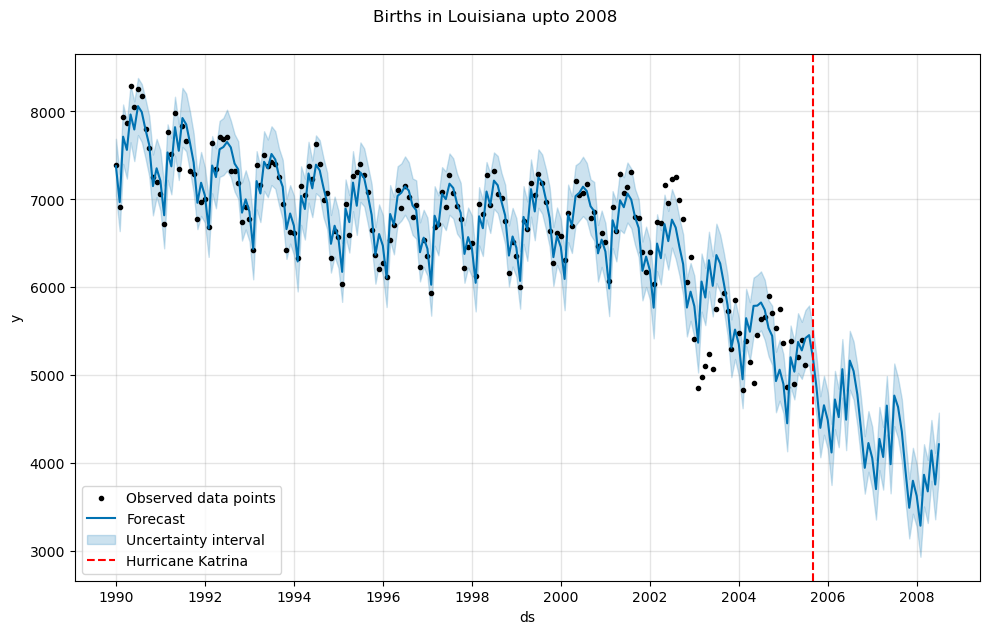

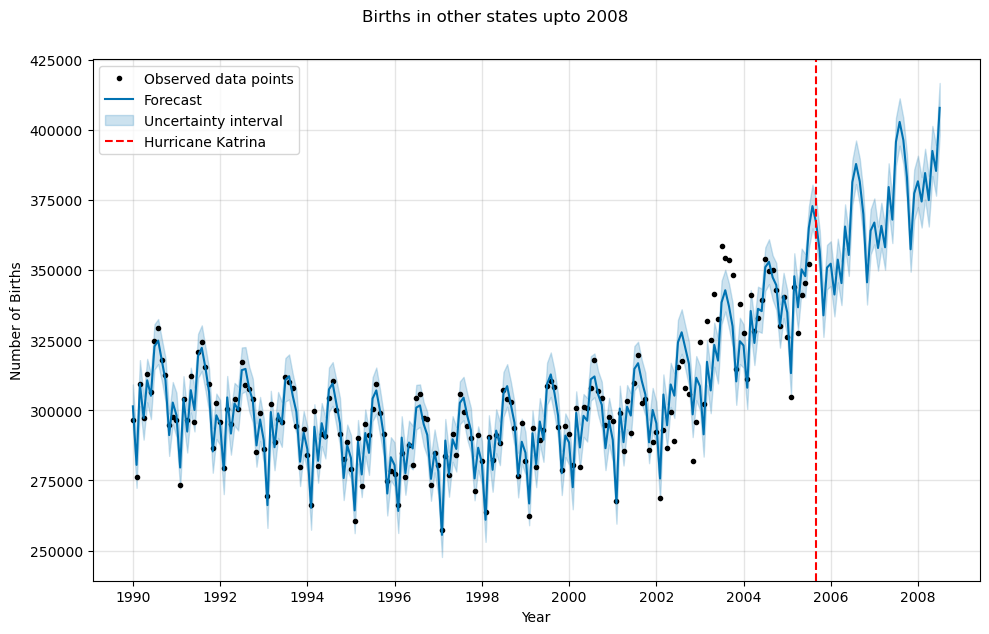

In [844]:
# plot the prediction
fig_katrina = m_katrina.plot(forecast_katrina)
fig_katrina.suptitle('Births in Louisiana upto 2008', fontsize=12, y=1.05, x=0.5) 
# mark the date of the event
plt.axvline(x=pd.to_datetime('2005-08-29'), color='red', linestyle='--', label='Hurricane Katrina')
plt.legend()

fig_katrina_other = m_katrina_other.plot(forecast_katrina_other)
fig_katrina_other.suptitle('Births in other states upto 2008', fontsize=12, y=1.05, x=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Births')
# mark the date of the event
plt.axvline(x=pd.to_datetime('2005-08-29'), color='red', linestyle='--', label='Hurricane Katrina')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()



/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

Text(0.5, 0.98, 'Prediction for Other States (post Katrina)')

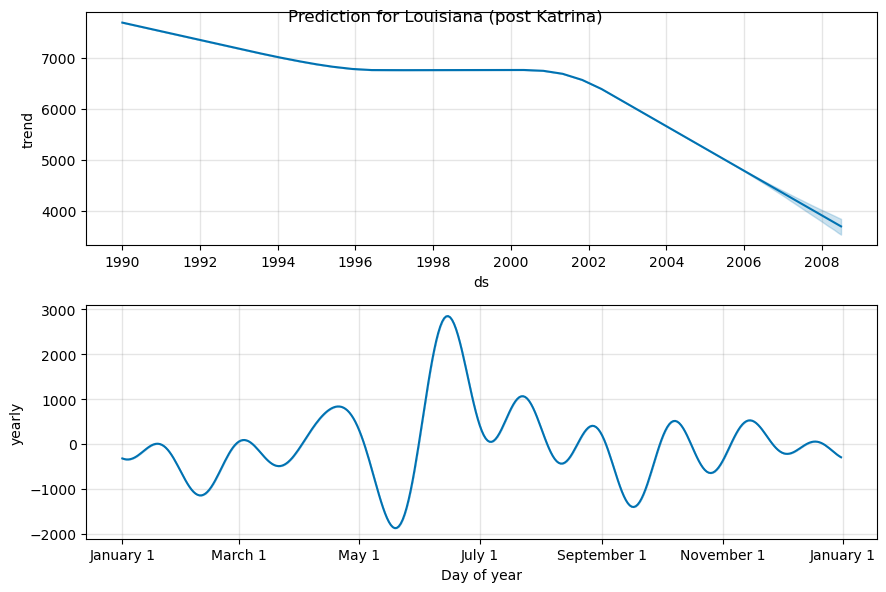

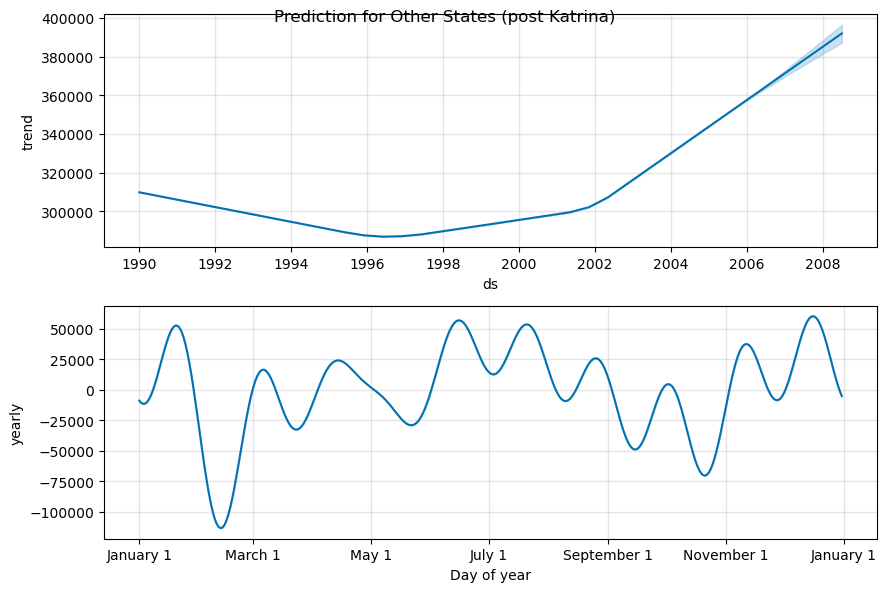

In [845]:
# plot the components
fig_katrina_comp = m_katrina.plot_components(forecast_katrina)
fig_katrina_comp.suptitle('Prediction for Louisiana (post Katrina)', fontsize=12)
fig_katrina_other_comp = m_katrina_other.plot_components(forecast_katrina_other)
fig_katrina_other_comp.suptitle('Prediction for Other States (post Katrina)', fontsize=12)

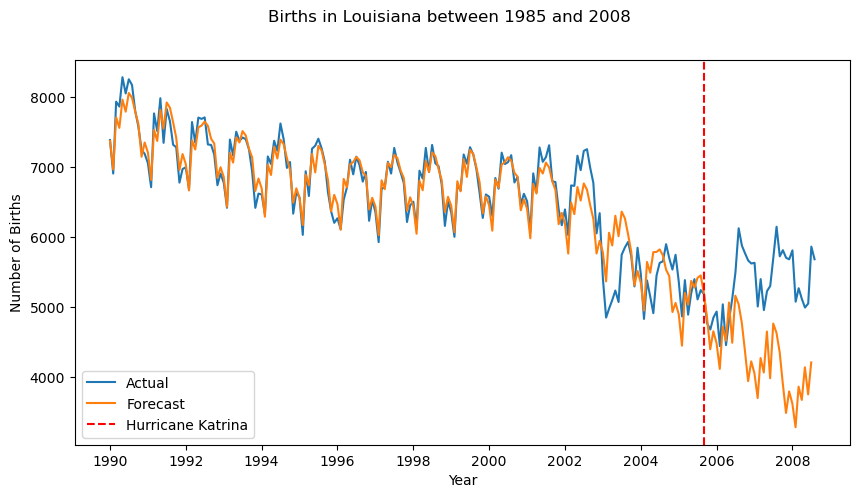

In [846]:
#plot the forecast and actual data for Katrina data
plt.figure(figsize=(10,5)).suptitle('Births in Louisiana between 1985 and 2008')
plt.plot(la_katrina_actual_df['ds'], la_katrina_actual_df['y'], label='Actual')
plt.plot(forecast_katrina['ds'], forecast_katrina['yhat'], label='Forecast')
# Mark the Katrina event
event_date = pd.to_datetime('2005-08-29')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

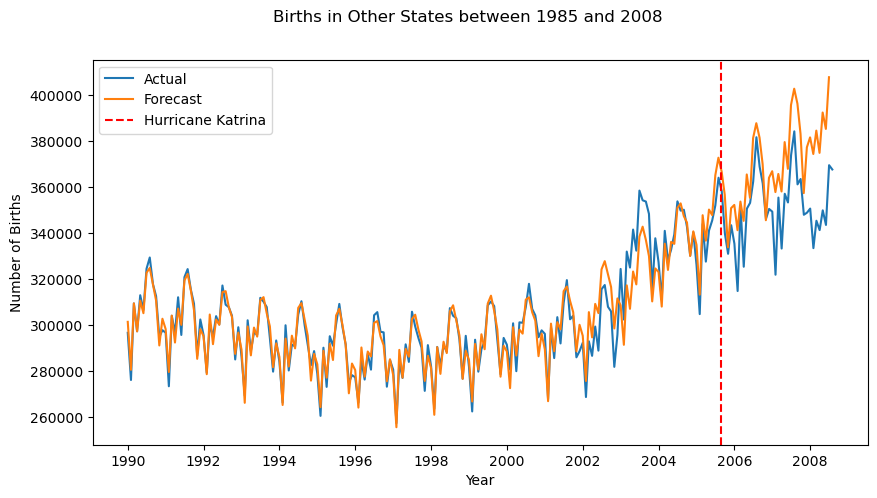

In [847]:
#plot the forecast and actual data for Katrina data for other states
plt.figure(figsize=(10,5)).suptitle('Births in Other States between 1985 and 2008')
plt.plot(other_states_katrina_actual_df['ds'], other_states_katrina_actual_df['y'], label='Actual')
plt.plot(forecast_katrina_other['ds'], forecast_katrina_other['yhat'], label='Forecast')
# Mark the Katrina event
event_date = pd.to_datetime('2005-08-29')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()
